In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## THEORETICAL DEFINITION OF THE MAIN FUNCTIONS

### (1) Random Numbers Generator Functions

In [2]:
def X_Data_Generator(first_number, last_number, quantity_of_numbers):
    Data_X=np.sort(random.sample(range(first_number, last_number), quantity_of_numbers))   
    return(Data_X)

def Y_Data_Generator(Data_X, Real_Slope, Real_Bias, Variance):
    Data_Y=np.arange(np.size(Data_X))
    for i in np.arange(np.size(Data_X)):
        Data_Y[i]=random.gauss((Real_Slope)*Data_X[i] + Real_Bias, Variance)
    return(Data_Y)

### (2) Training Linear Regression Function

In [3]:
def Training_Linear_Regression(Training_Data):
    M_x=Training_Data[:,0].mean()
    M_y=Training_Data[:,1].mean()
    M_xy=(Training_Data[:,0]*Training_Data[:,1]).mean()
    S_x=Training_Data[:,0].var()
    
    Slope= (M_xy - M_x*M_y)/S_x
    Bias=M_y - Slope*(M_x)
    return(Slope,Bias)

### (3) True Parameters and Function

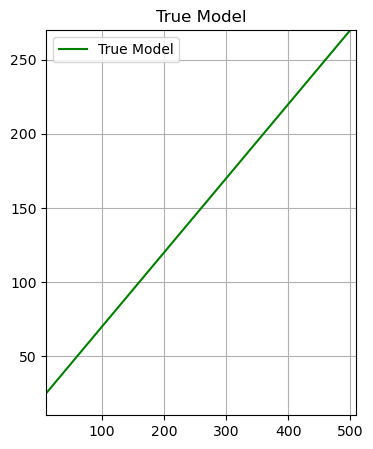

In [4]:
Real_Slope=0.5
Real_Bias=20

plt.figure(figsize=(4, 5))
plt.title('True Model')


plt.plot(list(range(0, 500)), [(Real_Slope)*x + Real_Bias for x in range(0,500)], c='green')
plt.legend(['True Model'], loc='upper left')
plt.xlim(10, 510)
plt.ylim(10,270)
plt.grid()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## EXPERIMENT: COMPARISON OF REGRESSION PARAMETERS OBTAINED BY 2 SAMPLES

### Sample 1

In [15]:
Data1_X = X_Data_Generator(20,500,30)                                      # Sample size = 30 (number of elements)
Data1_Y = Y_Data_Generator(Data1_X, 0.5, 20, 20)       
Training_Data_1=(np.array([Data1_X,Data1_Y])).T
Slope_1=Training_Linear_Regression(Training_Data_1)[0]
Bias_1=Training_Linear_Regression(Training_Data_1)[1]

### Sample 2 (Sample 1 is a subset of Sample 2)

In [16]:
Data2_X = X_Data_Generator(20,500,150)                                      # Sample size = 150 (number of elements)
Data2_Y = Y_Data_Generator(Data2_X, 0.5, 20, 20)       
Training_Data_2=(np.array([Data2_X,Data2_Y])).T
Training_Data_2=np.concatenate((Training_Data_1,Training_Data_2), axis=0)   # I make sure Training_Data_1 is a 
                                                                            # subset of Training_Data_2
Slope_2=Training_Linear_Regression(Training_Data_2)[0]
Bias_2=Training_Linear_Regression(Training_Data_2)[1]

### Comparison of regression parameters obtained from the 2  samples

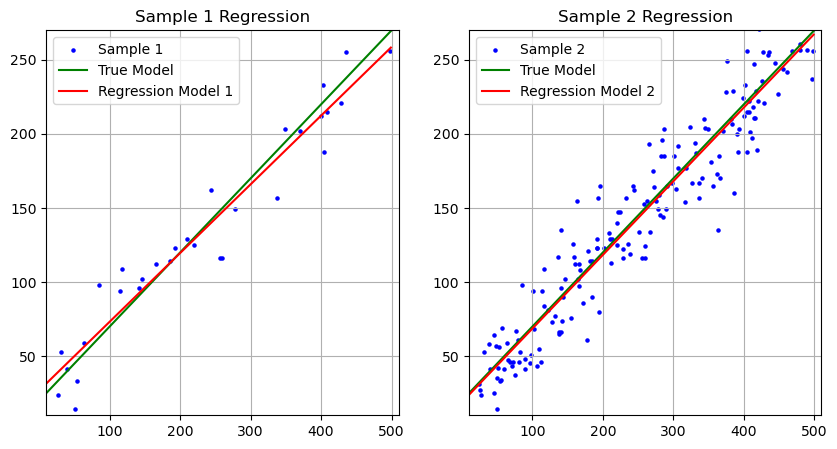

In [17]:
plt.figure(figsize=(10, 5))
plt.title('Comparison')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.title('Sample 1 Regression')
plt.scatter(Training_Data_1[:,0], Training_Data_1[:,1], s=5, c='blue')
plt.plot(list(range(0, 500)), [(Real_Slope)*x + Real_Bias for x in range(0,500)], c='green')     # True Function
plt.plot(list(range(0, 500)), [Slope_1*x + Bias_1 for x in range(0,500)], c='red')               # Regression Model
plt.legend(['Sample 1', 'True Model', 'Regression Model 1'], loc='upper left')
plt.xlim(10, 510)
plt.ylim(10,270)
plt.grid()


plt.subplot(1, 2, 2)  # rows, columns, panel selected
plt.title('Sample 2 Regression')
plt.scatter(Training_Data_2[:,0], Training_Data_2[:,1], s=5, c='blue')
plt.plot(list(range(0, 500)), [(Real_Slope)*x + Real_Bias for x in range(0,500)], c='green')     # True Function
plt.plot(list(range(0, 500)), [Slope_2*x + Bias_2 for x in range(0,500)], c='red')               # Regression Model
plt.legend(['Sample 2', 'True Model', 'Regression Model 2'], loc='upper left')
plt.xlim(10, 510)
plt.ylim(10,270)
plt.grid()


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## RUNNING THE EXPERIMENT MULTIPLE TIMES

In [18]:
i=0                

regression_1=0     # this flag increase its value when the parameters I get from sample 1 are closer to the real parameters
                   # than the parameters I get from sample 2.
    
regression_2=0     # this flag increase its value when the parameters I get from sample 2 are closer to the real parameters
                   # than the parameters I get from sample 1.

N=1000             # Number of experiments that I perform with the while loop.




while i<N:
    
    # Through the Training_Linear_Regression function, I get the regression parameters from Sample 1.
    
    Data1_X = X_Data_Generator(20,500,20)
    Data1_Y = Y_Data_Generator(Data1_X, 0.5, 20, 20)       
    Training_Data_1=(np.array([Data1_X,Data1_Y])).T
    Slope_1=Training_Linear_Regression(Training_Data_1)[0]
    Bias_1=Training_Linear_Regression(Training_Data_1)[1]
 


    # Through the Training_Linear_Regression function, I get the regression parameters from Sample 2.
    
    Data2_X = X_Data_Generator(20,500,120)
    Data2_Y = Y_Data_Generator(Data2_X, 0.5, 20, 20)      
    Training_Data_2=(np.array([Data2_X,Data2_Y])).T
    Training_Data_2=np.concatenate((Training_Data_1,Training_Data_2), axis=0)                                                                       
    Slope_2=Training_Linear_Regression(Training_Data_2)[0]
    Bias_2=Training_Linear_Regression(Training_Data_2)[1]

    
    
    # Here I compare which parameters are closer to the real one. If regression parameters of Sample 1 are better
    # the relative flag regression_1 will be increased by one, otherwise the flag regression_2 relative to 
    # Sample 2 will be increased.

    if abs(Slope_1-Real_Slope)>abs(Slope_2-Real_Slope) and abs(Bias_1-Real_Bias)>abs(Bias_2-Real_Bias):
        regression_2+= 1
    
    elif abs(Slope_1-Real_Slope)<=abs(Slope_2-Real_Slope) or abs(Bias_1-Real_Bias)<=abs(Bias_2-Real_Bias):
        regression_1+= 1
    
    i+=1

    
print(f"The number of time the regression with more data is better than the one with less data is: {regression_2}")
print(f"The number of time the regression with more data is worse than the one with less data is: {regression_1}")
print(f"The total number of experiments is: {i}")

The number of time the regression with more data is better than the one with less data is: 661
The number of time the regression with more data is worse than the one with less data is: 339
The total number of experiments is: 1000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## CONCLUSION

We have seen that the parameters we got from a sample are closer to the real one as much as the size of the sample increase, namely the number of elements of the sample tend to infinity. Eventhough it was ''easier'' to say that the regression parameters of sample 1 were better than the parameters related to sample 2, we confirmed that regression parameters of sample 2 were better. In fact, in the last while loop, in order to increase by one the flag ''regression_1'' was enough that one of the 2 regression parameters were better than the relative parameter of regression 2. On the other hand, in order to increase the flag ''regression_2'', was necessary to check that both the regression parameters of sample 2 were better than relative parameters of sample 1.